# Exploratory Data Analysis on Electric Vehicle Population Data
This dataset provides valuable insights into the battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs) registered through the Washington State Department. The dataset offers a comprehensive view of the electric vehicle landscape, including various attributes such as VIN, county, city, state, postal code, model year, make, model, electric vehicle type, clean alternative fuel vehicle eligibility, electric range, base MSRP, legislative district, DOL vehicle ID, vehicle location, electric utility, and 2020 Census tract.

Data Sources:
The Electric Vehicle Population Data is sourced from the State of Washington's Department of Licensing. It is a reliable and up-to-date dataset that provides detailed information about registered electric vehicles in the state.

Main Features:
The dataset encompasses a wide range of features, enabling comprehensive analysis of the electric vehicle population. Some of the main features include:

- VIN: The unique identifier for each registered electric vehicle.
- County, City, and State: Geographic information indicating the location of the registered vehicles.
- Model Year, Make, and Model: Information about the vehicle's year of manufacture, make, and specific model.
- Electric Vehicle Type: Categorization of the vehicle as either a battery electric vehicle (BEV) or a plug-in hybrid electric vehicle (PHEV).
- Electric Range: The estimated or official electric range of the vehicle.
- Base MSRP: The manufacturer's suggested retail price for the vehicle.
- Clean Alternative Fuel Vehicle Eligibility: Indicates whether the vehicle is eligible for clean alternative fuel vehicle incentives or benefits.
- Legislative District: Information about the legislative district associated with the vehicle's registration.
- DOL Vehicle ID: Unique identifier assigned by the Department of Licensing.
- Vehicle Location: Details about the vehicle's location.
- Electric Utility: Information about the electric utility associated with the vehicle's charging.
- 2020 Census Tract: Census tract information for demographic analysis and geographical representation.

Key Questions and Answers:

What is the distribution of electric vehicles by make and model year?
Answer: By grouping the data by make and model year, we can analyze the number of electric vehicles for each combination.

How does the electric range vary among different vehicle types?
Answer: By grouping the data by electric vehicle type, we can compare the electric range distribution for battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs).

Which cities have the highest number of electric vehicles registered?
Answer: By grouping the data by city and counting the number of electric vehicles, we can identify the top cities with the highest EV registrations.

What is the average electric range by make?
Answer: By grouping the data by make and calculating the average electric range, we can compare the electric ranges across different vehicle manufacturers.

How does the base MSRP vary for different electric vehicle types?
Answer: By grouping the data by electric vehicle type and calculating the average base MSRP, we can analyze the price differences between BEVs and PHEVs.

These questions and their corresponding answers highlight the analytical potential of the Electric Vehicle Population Data and demonstrate its value for understanding electric vehicle trends, market dynamics, and consumer preferences.

By leveraging this dataset, I have conducted various analyses and visualizations that showcase my skills in data analysis and presentation.

Load Packages

In [80]:
import pandas as pd
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Data

In [81]:
df = pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD')
conn = sqlite3.connect('evpd.db')
df.to_sql('evpd', conn, if_exists='replace', index=False)

138779

In [82]:
query = '''
SELECT COUNT(*) 
FROM evpd;
'''
df = pd.read_sql_query(query, conn)
df

,COUNT(*)
0,138779


In [83]:
query = '''
PRAGMA table_info(evpd);
'''
df = pd.read_sql_query(query, conn)
df

,cid,name,type,notnull,dflt_value,pk
0,0,VIN (1-10),TEXT,0,None,0
1,1,County,TEXT,0,None,0
2,2,City,TEXT,0,None,0
3,3,State,TEXT,0,None,0
4,4,Postal Code,REAL,0,None,0
5,5,Model Year,INTEGER,0,None,0
6,6,Make,TEXT,0,None,0
7,7,Model,TEXT,0,None,0
8,8,Electric Vehicle Type,TEXT,0,None,0
9,9,Clean Alternative Fuel Vehicle (CAFV) Eligibility,TEXT,0,None,0


In [84]:
query = '''
SELECT COUNT(*) AS Zero_Count
FROM evpd
WHERE `Base MSRP` = 0;
'''
df = pd.read_sql_query(query, conn)
df

,Zero_Count
0,135366


In [85]:
query = '''
SELECT DISTINCT Model
FROM evpd;
'''
df = pd.read_sql_query(query, conn)
df


,Model
0,LEAF
1,MODEL X
2,I-PACE
3,VOLT
4,MODEL 3
...,...
122,WHEEGO
123,745LE
124,CITY
125,FLYING SPUR


In [86]:
query = '''
SELECT Make, COUNT(*) AS Count
FROM evpd
GROUP BY Make
ORDER BY Count DESC;
'''
df = pd.read_sql_query(query, conn)
df

,Make,Count
0,TESLA,63187
1,NISSAN,13207
2,CHEVROLET,11548
3,FORD,7068
4,BMW,6028
5,KIA,5671
6,TOYOTA,4949
7,VOLKSWAGEN,3712
8,VOLVO,3328
9,JEEP,2946


In [87]:
query = '''
SELECT Make, AVG(`Electric Range`) AS Avg_Electric_Range
FROM evpd
GROUP BY Make
ORDER BY Avg_Electric_Range DESC;
'''
df = pd.read_sql_query(query, conn)
df


,Make,Avg_Electric_Range
0,JAGUAR,206.594595
1,WHEEGO ELECTRIC CARS,100.000000
2,TH!NK,100.000000
3,TESLA,97.349740
4,CHEVROLET,96.504676
5,NISSAN,86.507837
6,FIAT,85.639364
7,SMART,62.416667
8,AZURE DYNAMICS,56.000000
9,KIA,55.369952


In [88]:
query = '''
SELECT Make, Model Year, AVG(`Electric Range`) AS Avg_Range
FROM evpd
GROUP BY Make, `Model Year`
ORDER BY Make, `Model Year`;
'''
df = pd.read_sql_query(query, conn)
df

,Make,Year,Avg_Range
0,AUDI,A3,16.000000
1,AUDI,A3,16.000000
2,AUDI,A3,16.000000
3,AUDI,E-TRON,204.000000
4,AUDI,Q5 E,43.421053
...,...,...,...
222,VOLVO,XC90,18.489474
223,VOLVO,XC40,11.323810
224,VOLVO,XC60,16.491684
225,VOLVO,XC90,15.898004


In [89]:
query = '''
SELECT County, COUNT(*) AS Count
FROM evpd
GROUP BY County
ORDER BY Count DESC
LIMIT 10;
'''
df = pd.read_sql_query(query, conn)
df


,County,Count
0,King,72919
1,Snohomish,15707
2,Pierce,10633
3,Clark,8227
4,Thurston,4974
5,Kitsap,4582
6,Spokane,3418
7,Whatcom,3409
8,Benton,1705
9,Island,1542


In [90]:
query = '''
SELECT 'average' AS Category,
    AVG(`Electric Range`) AS Average_Electric_Range,
    AVG(`Base MSRP`) AS Average_Base_MSRP
FROM evpd
UNION
SELECT 'min' AS Category,
    MIN(`Electric Range`) AS Min_Electric_Range,
    MIN(`Base MSRP`) AS Min_Base_MSRP
FROM evpd
UNION
SELECT 'max' AS Category,
    MAX(`Electric Range`) AS Max_Electric_Range,
    MAX(`Base MSRP`) AS Max_Base_MSRP
FROM evpd;
'''
df = pd.read_sql_query(query, conn)
df

,Category,Average_Electric_Range,Average_Base_MSRP
0,average,72.30576,1405.49777
1,max,337.00000,845000.00000
2,min,0.00000,0.00000


Query to find the top 5 models with the highest average electric range for vehicles from the top 3 manufacturers

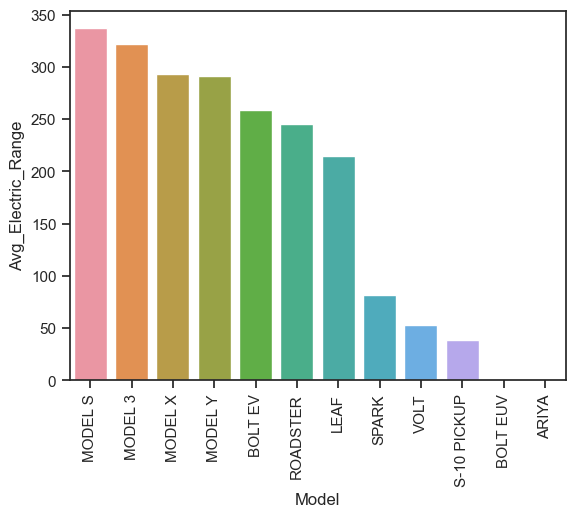

In [91]:
query = '''
SELECT Model, AVG(`Electric Range`) AS Avg_Electric_Range
FROM (
    SELECT Model, `Electric Range`, Make,
        ROW_NUMBER() OVER (PARTITION BY Model ORDER BY `Electric Range` DESC) AS rn
    FROM evpd
    WHERE Make IN (
        SELECT Make
        FROM (
            SELECT Make, COUNT(*) AS EV_Count
            FROM evpd
            GROUP BY Make
            ORDER BY EV_Count DESC
            LIMIT 3
        ) AS top_manufacturers
    )
) AS subquery
WHERE rn <= 5
GROUP BY Model
ORDER BY Avg_Electric_Range DESC;
'''
df = pd.read_sql_query(query, conn)

# Create a bar plot with rotated x-axis labels
sns.barplot(data=df, x='Model', y='Avg_Electric_Range')
plt.xticks(rotation=90)

# Display the plot
plt.show()


Average Electric Range by Make and Model Year. Point plot that displays the average electric range for each make and model year.

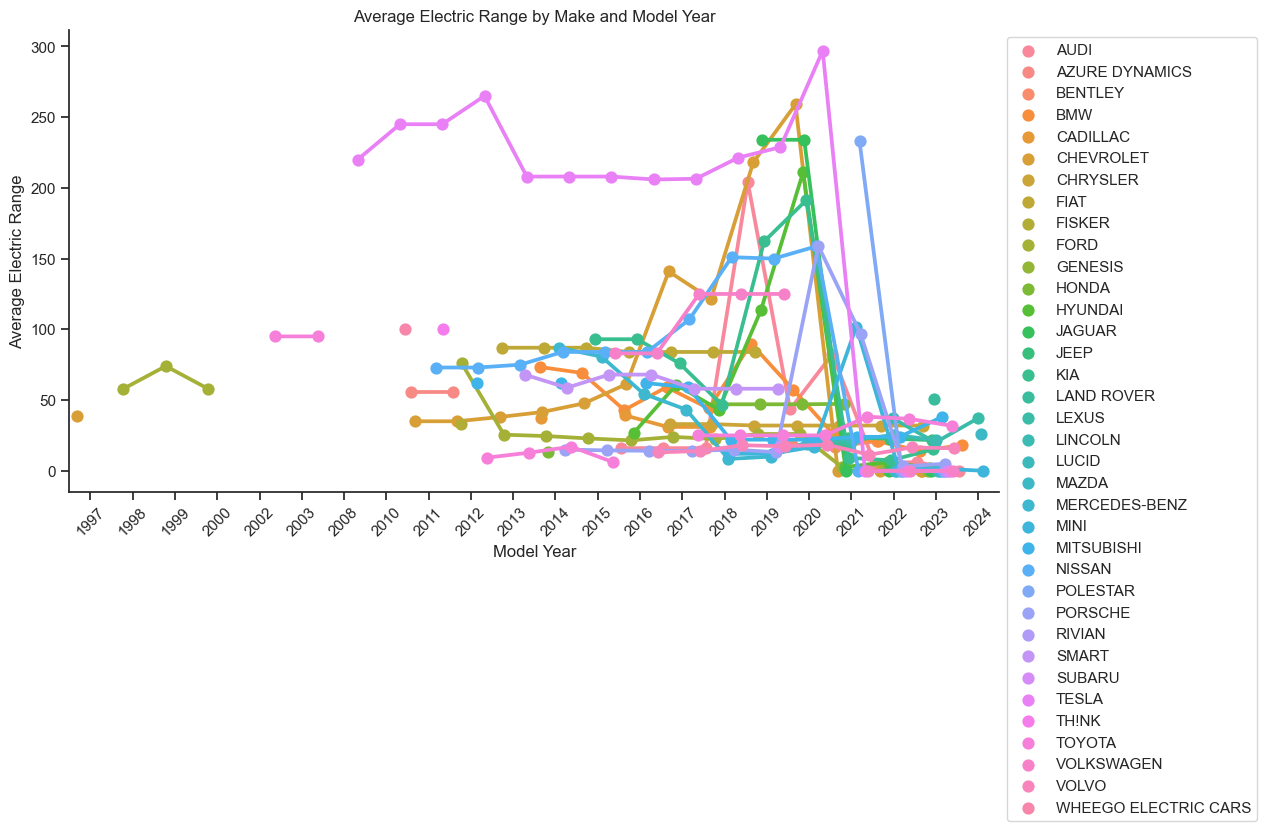

In [92]:
query = '''
SELECT Make, `Model Year`, AVG(`Electric Range`) AS Avg_Electric_Range
FROM evpd
GROUP BY Make, `Model Year`;
'''
df = pd.read_sql_query(query, conn)

# Create a point plot with improved aesthetics
sns.set(style='ticks', palette='Set2')

# Adjust the figure size if needed
plt.figure(figsize=(12, 6))

# Create the point plot
sns.pointplot(data=df, x='Model Year', y='Avg_Electric_Range', hue='Make', dodge=True)

# Set the x-axis label
plt.xlabel('Model Year')

# Set the y-axis label
plt.ylabel('Average Electric Range')

# Set the title
plt.title('Average Electric Range by Make and Model Year')

# Customize the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


Distribution of Electric Range by Electric Vehicle Type

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

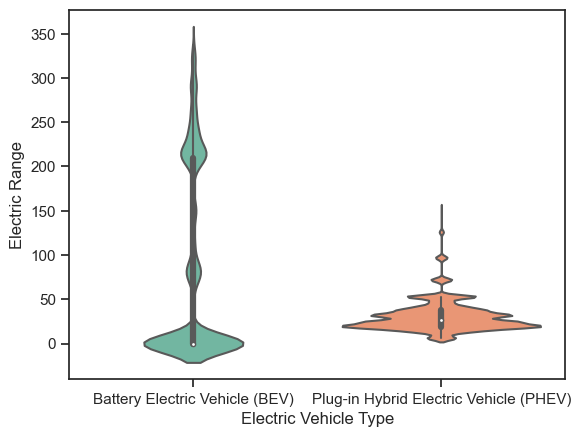

In [93]:
query = '''
SELECT `Electric Vehicle Type`, `Electric Range`
FROM evpd
WHERE `Electric Vehicle Type` IS NOT NULL;
'''
df = pd.read_sql_query(query, conn)

# Create a violin plot
sns.violinplot(data=df, x='Electric Vehicle Type', y='Electric Range')

Top 10 Cities with the Highest Number of Electric Vehicles

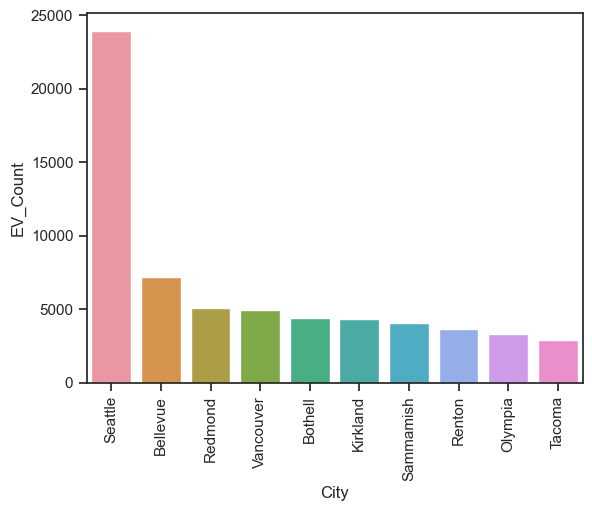

In [94]:
query = '''
SELECT City, COUNT(*) AS EV_Count
FROM evpd
GROUP BY City
ORDER BY EV_Count DESC
LIMIT 10;
'''
df = pd.read_sql_query(query, conn)

# Create a bar plot
sns.barplot(data=df, x='City', y='EV_Count')
plt.xticks(rotation=90)

# Display the plot
plt.show()

Average Base MSRP by Electric Vehicle Type. This will create a bar plot that shows the average base MSRP for each electric vehicle type.

<Axes: xlabel='Electric Vehicle Type', ylabel='Avg_Base_MSRP'>

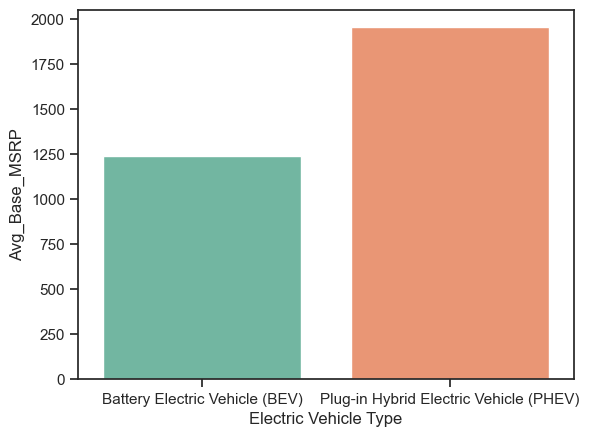

In [95]:
query = '''
SELECT `Electric Vehicle Type`, AVG(`Base MSRP`) AS Avg_Base_MSRP
FROM evpd
WHERE `Base MSRP` IS NOT NULL
GROUP BY `Electric Vehicle Type`;
'''
df = pd.read_sql_query(query, conn)

# Create a bar plot
sns.barplot(data=df, x='Electric Vehicle Type', y='Avg_Base_MSRP')

Get EV Type percentage by County with self-join

In [96]:
query = '''
SELECT 
    EV_Type.State,
    EV_Type.ElectricVehicleType,
    CAST(EV_Type.Count AS FLOAT) / Total.Count * 100 AS EV_Type_Percentage
FROM 
(
    SELECT 
        State,
        COUNT(*) AS Count
    FROM 
        evpd
    GROUP BY 
        State
) AS Total
LEFT JOIN 
(
    SELECT 
        State,
        "Electric Vehicle Type" AS ElectricVehicleType,
        COUNT(*) AS Count
    FROM 
        evpd
    GROUP BY 
        State, "Electric Vehicle Type"
) AS EV_Type
ON 
    Total.State = EV_Type.State;


'''
df = pd.read_sql_query(query, conn)
df

,State,ElectricVehicleType,EV_Type_Percentage
0,AK,Plug-in Hybrid Electric Vehicle (PHEV),100.000000
1,AL,Battery Electric Vehicle (BEV),100.000000
2,AP,Battery Electric Vehicle (BEV),100.000000
3,AR,Battery Electric Vehicle (BEV),100.000000
4,AZ,Battery Electric Vehicle (BEV),66.666667
...,...,...,...
63,VA,Battery Electric Vehicle (BEV),62.500000
64,VA,Plug-in Hybrid Electric Vehicle (PHEV),37.500000
65,WA,Battery Electric Vehicle (BEV),76.976687
66,WA,Plug-in Hybrid Electric Vehicle (PHEV),23.023313


This query categorizes the electric range of EVs into two groups: over 200 and 200 and below. It returns the counties where the number of EVs with a range over 200 is greater than the number of EVs with a range 200 and below.

In [97]:
query = '''
SELECT 
    County, 
    COUNT(*) as Total, 
    SUM(CASE WHEN "Electric Range" > 200 THEN 1 ELSE 0 END) as "Range Over 200", 
    SUM(CASE WHEN "Electric Range" <= 200 THEN 1 ELSE 0 END) as "Range 200 and Below" 
FROM 
    evpd
GROUP BY 
    County
HAVING 
    "Range Over 200" > "Range 200 and Below";

'''
df = pd.read_sql_query(query, conn)
df

,County,Total,Range Over 200,Range 200 and Below
0,None,3,2,1
1,Allen,1,1,0
2,Arlington,1,1,0
3,Boulder,1,1,0
4,Broward,1,1,0
5,Champaign,1,1,0
6,Gwinnett,1,1,0
7,Hawaii,1,1,0
8,Hennepin,1,1,0
9,Houston,1,1,0


This query returns the county, number of EVs, average range category ('High Average Range' or 'Low Average Range'), and EV count category ('High EV Count' or 'Low EV Count') for each county. The 'High Average Range' category represents counties where the average electric range of the EVs is above 200, while the 'High EV Count' category represents counties with more than 1000 EVs. Since we don't have population in this dataset, we are using absolute numbers.

In [98]:
query = '''
SELECT 
    County, 
    COUNT(*) as "Number_of_EVs", 
    CASE 
        WHEN AVG("Electric Range") > 200 THEN 'High Average Range' 
        ELSE 'Low Average Range' 
    END as "Range_Category", 
    CASE 
        WHEN COUNT(*) > 1000 THEN 'High EV Count' 
        ELSE 'Low EV Count' 
    END as "EV_Count_Category"
FROM 
    evpd
GROUP BY 
    County;
'''
df = pd.read_sql_query(query, conn)
df

,County,Number_of_EVs,Range_Category,EV_Count_Category
0,None,3,Low Average Range,Low EV Count
1,Adams,41,Low Average Range,Low EV Count
2,Alameda,3,Low Average Range,Low EV Count
3,Alexandria,4,Low Average Range,Low EV Count
4,Allen,1,High Average Range,Low EV Count
...,...,...,...,...
169,Williamson,1,Low Average Range,Low EV Count
170,Wilson,1,Low Average Range,Low EV Count
171,Yakima,759,Low Average Range,Low EV Count
172,Yavapai,1,High Average Range,Low EV Count
